What I learned:
1. Learning Rate Decay
2. Normalizing data

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [2]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

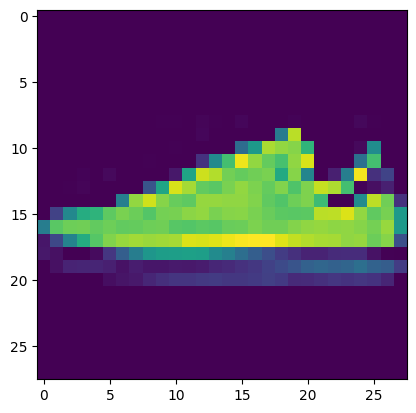

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_data[6])

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Dress')

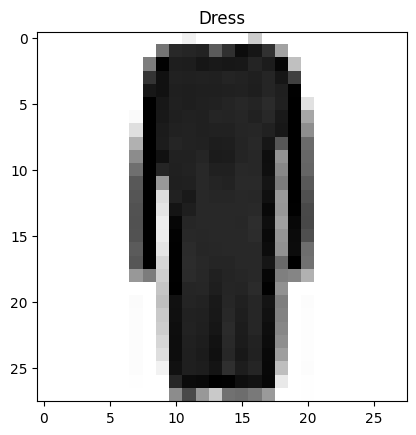

In [5]:
index_of_choice = 25

plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

In [6]:
train_data[0].shape

(28, 28)

Data Pre-processing

In [7]:
train_data.min(), train_data.max()

(0, 255)

In [8]:
train_data = train_data / 255.0
test_data = test_data / 255.0

Model Building

In [9]:
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


model = tf.keras.Sequential([
    Flatten(input_shape = (28,28)),
    Dense(4, activation = "relu"),
    Dense(4, activation = "relu"),
    Dense(10, activation = "softmax")
])

In [10]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = "accuracy"
              )

In [11]:
## Introducing learning rate decay

lr_decay = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

In [13]:
record = model.fit(train_data,
                   train_labels,
                   epochs = 10,
                  #  validation_data = (test_data, test_labels),
                   callbacks = [lr_decay])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8110 - accuracy: 0.6413 - lr: 1.0000e-04
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8026 - accuracy: 0.6431 - lr: 1.1220e-04
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7943 - accuracy: 0.6460 - lr: 1.2589e-04
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7862 - accuracy: 0.6507 - lr: 1.4125e-04
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7782 - accuracy: 0.6575 - lr: 1.5849e-04
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7700 - accuracy: 0.6638 - lr: 1.7783e-04
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7625 - accuracy: 0.6698 - lr: 1.9953e-04
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7548 - accuracy: 0.6766 - lr: 2.2387e-04
Epoch 9/10
1875/1875 [==========================